In [1]:
import csv
import json
import networkx as nx
edges = {}

with open('graph.csv', newline='') as graph_csv_file:
    reader = csv.DictReader(graph_csv_file)
    for row in reader:
        edges[row['node']] = json.loads(row['edges_within_category'])['key']
        edges[row['node']].extend(json.loads(row['edges_outside_category'])['key'])

In [2]:
G = nx.DiGraph()

In [3]:
for source_article, target_articles in edges.items():
    for target_article in target_articles:
        G.add_edge(source_article, target_article)

In [4]:
betweenness_centrality = nx.betweenness_centrality(G)

In [5]:
betweenness_centrality_values = list(betweenness_centrality.values())

In [6]:
import numpy as np
mean_centrality = np.mean(betweenness_centrality_values)
median_centrality = np.median(betweenness_centrality_values)
max_centrality = np.max(betweenness_centrality_values)
min_centrality = np.min(betweenness_centrality_values)
std_centrality = np.std(betweenness_centrality_values)


print(f"Mean Centrality: {mean_centrality}")
print(f"Median Centrality: {median_centrality}")
print(f"Max Centrality: {max_centrality}")
print(f"Min Centrality: {min_centrality}")
print(f"Standard Deviation of Centrality: {std_centrality}")

Mean Centrality: 0.00014806724087547524
Median Centrality: 5.395313424728606e-06
Max Centrality: 0.053242622223059206
Min Centrality: 0.0
Standard Deviation of Centrality: 0.0010246212990612006


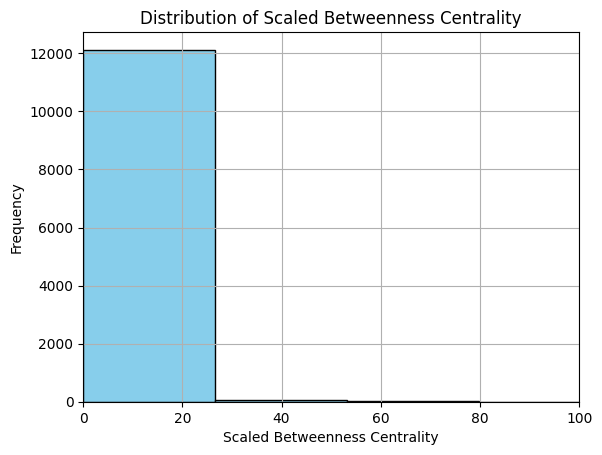

In [7]:
import matplotlib.pyplot as plt
scaling_factor = 10000
scaled_betweenness = {article: centrality * scaling_factor for article, centrality in betweenness_centrality.items()}

plt.hist(scaled_betweenness.values(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Scaled Betweenness Centrality')
plt.ylabel('Frequency')
plt.title('Distribution of Scaled Betweenness Centrality')
plt.xlim(0, 100)
plt.grid(True)
plt.show()

In [34]:
top_num=100
#this is the top articles that we want to compare

In [35]:
sorted_between = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
top_20_between = sorted_between[:top_num]
#for i, (article, centrality) in enumerate(top_20_between, 1):
    #print(f"{i}. Article: {article}, Betweenness Centrality: {centrality}")

In [9]:
katz_centrality = nx.katz_centrality_numpy(G)

In [10]:
katz_centrality_values = list(katz_centrality.values())

In [11]:
mean_centrality = np.mean(katz_centrality_values)
median_centrality = np.median(katz_centrality_values)
max_centrality = np.max(katz_centrality_values)
min_centrality = np.min(katz_centrality_values)
std_centrality = np.std(katz_centrality_values)


print(f"Mean Centrality: {mean_centrality}")
print(f"Median Centrality: {median_centrality}")
print(f"Max Centrality: {max_centrality}")
print(f"Min Centrality: {min_centrality}")
print(f"Standard Deviation of Centrality: {std_centrality}")

Mean Centrality: 7.993056239936387e-05
Median Centrality: -8.628814641213625e-05
Max Centrality: 0.07836152857588681
Min Centrality: -0.07102535589550593
Standard Deviation of Centrality: 0.00904729059066017


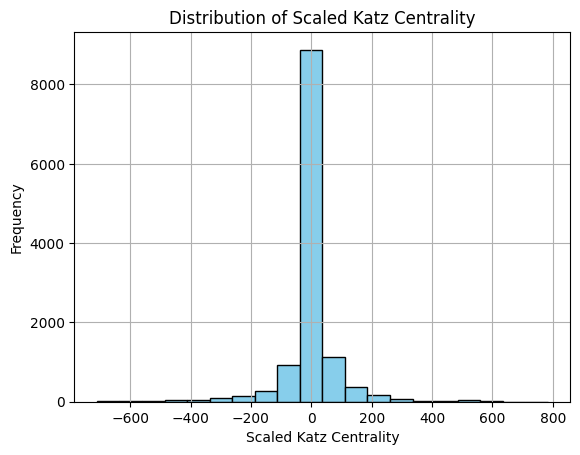

In [12]:
scaled_katz = {article: centrality * scaling_factor for article, centrality in katz_centrality.items()}
plt.hist(scaled_katz.values(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Scaled Katz Centrality')
plt.ylabel('Frequency')
plt.title('Distribution of Scaled Katz Centrality')
plt.grid(True)
plt.show()

In [36]:
sorted_katz = sorted(katz_centrality.items(), key=lambda x: x[1], reverse=True)
top_20_katz = sorted_katz[:top_num]
#for i, (article, centrality) in enumerate(top_20_katz, 1):
    #print(f"{i}. Article: {article}, Katz Centrality: {centrality}")

In [14]:
hub, authority = nx.hits(G)

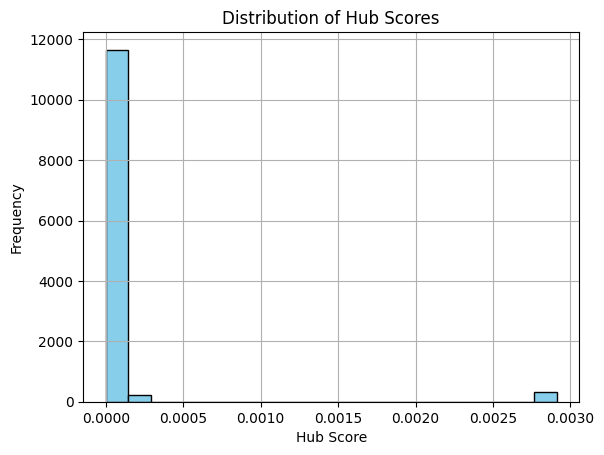

In [15]:
plt.hist(hub.values(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Hub Score')
plt.ylabel('Frequency')
plt.title('Distribution of Hub Scores')
plt.grid(True)
plt.show()

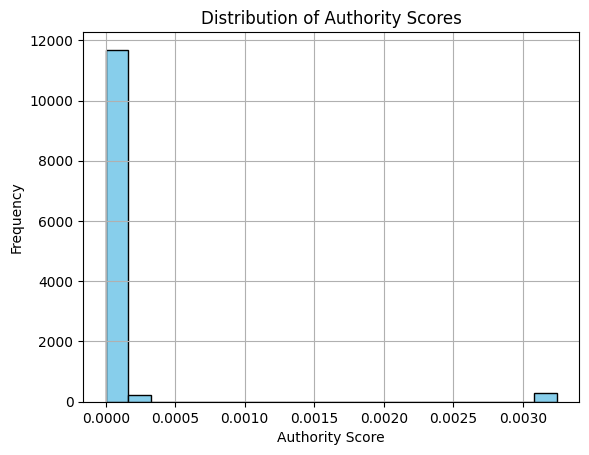

In [16]:
plt.hist(authority.values(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Authority Score')
plt.ylabel('Frequency')
plt.title('Distribution of Authority Scores')
plt.grid(True)
plt.show()

In [37]:
sorted_hub = sorted(hub.items(), key=lambda x: x[1], reverse=True)
top_20_hub = sorted_hub[:top_num]
#for i, (article, hub_score) in enumerate(top_20_hub, 1):
    #print(f"{i}. Article: {article}, hub score: {hub_score}")

In [38]:
sorted_authority = sorted(authority.items(), key=lambda x: x[1], reverse=True)
top_20_authority = sorted_authority[:top_num]
#for i, (article, authority_score) in enumerate(top_20_authority, 1):
    #print(f"{i}. Article: {article}, hub score: {authority_score}")

In [39]:
import json

with open("ranked_pageviews.json", "r") as file:
    ranked_pageviews = json.load(file)

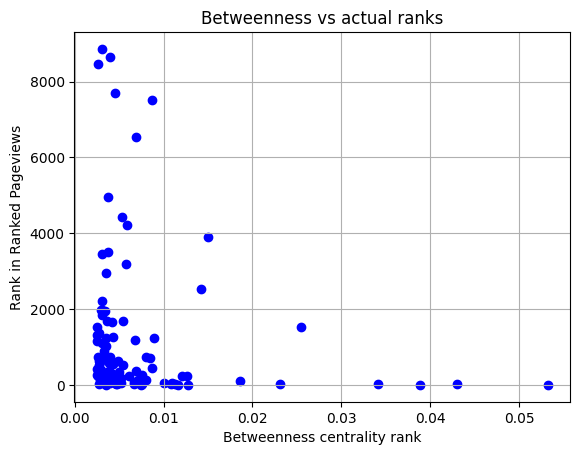

In [40]:
ranks = {}
for i, (article, centrality) in enumerate(top_20_between, 1):
    if article in ranked_pageviews:
        ranks[article] = ranked_pageviews[article]
between_ranks = [pair[1] for pair in top_20_between if pair[0] in ranks]
plt.scatter(between_ranks, list(ranks.values()), color='blue', marker='o')
plt.xlabel('Betweenness centrality rank')
plt.ylabel('Rank in Ranked Pageviews')
plt.title('Betweenness vs actual ranks')
plt.grid(True)
plt.show()

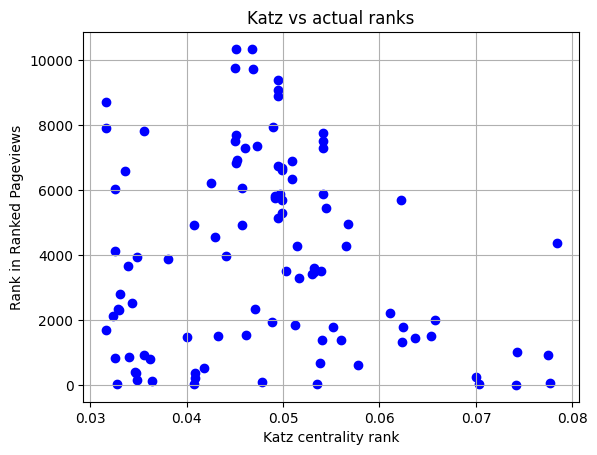

In [41]:
ranks = {}
for i, (article, centrality) in enumerate(top_20_katz, 1):
    if article in ranked_pageviews:
        ranks[article] = ranked_pageviews[article]
katz_ranks = [pair[1] for pair in top_20_katz if pair[0] in ranks]
plt.scatter(katz_ranks, list(ranks.values()), color='blue', marker='o')
plt.xlabel('Katz centrality rank')
plt.ylabel('Rank in Ranked Pageviews')
plt.title('Katz vs actual ranks')
plt.grid(True)
plt.show()

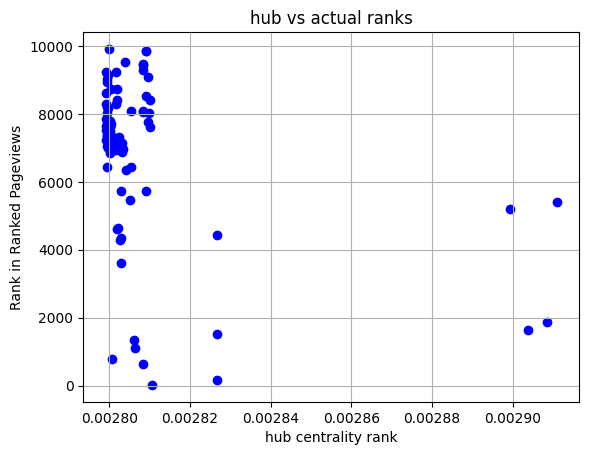

In [42]:
ranks = {}
for i, (article, centrality) in enumerate(top_20_hub, 1):
    if article in ranked_pageviews:
        ranks[article] = ranked_pageviews[article]
hub_ranks = [pair[1] for pair in top_20_hub if pair[0] in ranks]
plt.scatter(hub_ranks, list(ranks.values()), color='blue', marker='o')
plt.xlabel('hub centrality rank')
plt.ylabel('Rank in Ranked Pageviews')
plt.title('hub vs actual ranks')
plt.grid(True)
plt.show()

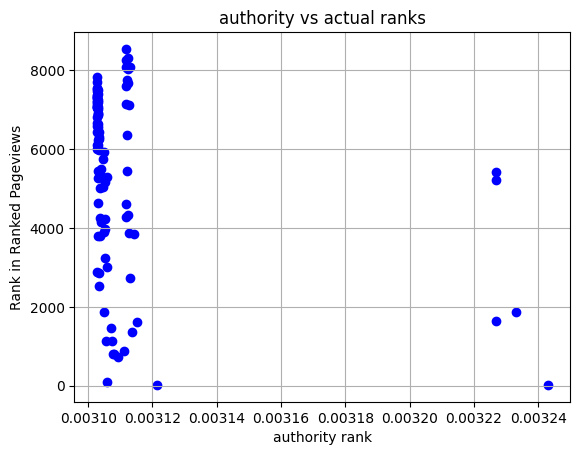

In [43]:
ranks = {}
for i, (article, centrality) in enumerate(top_20_authority, 1):
    if article in ranked_pageviews:
        ranks[article] = ranked_pageviews[article]
authority_ranks = [pair[1] for pair in top_20_authority if pair[0] in ranks]
plt.scatter(authority_ranks, list(ranks.values()), color='blue', marker='o')
plt.xlabel('authority rank')
plt.ylabel('Rank in Ranked Pageviews')
plt.title('authority vs actual ranks')
plt.grid(True)
plt.show()